In [ ]:
##List of files to use to create the list of intersecting ATAC and DHS around FSHB and DENND1A to deisgn the guides.

In [1]:
#Gene regions FSHB and DENND1A +1 100kb : FSHBDENND1A_plus100kb.bed
#CombinedATACseq data for H295R and COV4343 (generated by Revathy V) : H295R_COV434.ATACseq.UnionPeakSet.narrowPeak
#HoneyBadger DHS : /data/reddylab/Laavanya/pcosStarrSeq/experiments/HoneyBadgerEnhBedfiles/HoneyBadger2_Allregions/regions_all.bed
##This above files has scores for the DHS

In [2]:
%%bash
sbatch --job-name=intersect-ATAC-and-DHS-withgenereg \
    -p all \
    --exclude dl-01 \
    -o /data/reddylab/Laavanya/pcosStarrSeq/experiments/20211005-SelectingRegionsforguides/logs/interscet.%J.log \
    -e /data/reddylab/Laavanya/pcosStarrSeq/experiments/20211005-SelectingRegionsforguides/logs/intersect.%J.err \
    --mail-type=END,FAIL \
    --mail-user=ls331@duke.edu \
    <<'EOF'
#!/bin/bash

cd /data/reddylab/Laavanya/pcosStarrSeq/experiments/20211005-SelectingRegionsforguides

module load samtools
module load bedtools2
input_file="FSHBDENND1A_plus100kb.bed"
peak_file="H295R_COV434.ATACseq.UnionPeakSet.narrowPeak"
echo $input_file
bedtools intersect -wa -a ${peak_file} -b ${input_file} > FSHBDENND1A_ATAC_forgRNAdesign_100kb.bed

EOF

Submitted batch job 26612728


In [ ]:
##Above works so redoing it for DENND1A regions

In [10]:
%%bash
sbatch --job-name=intersect-ATAC-DHS-withgenereg \
    -p all \
    --exclude dl-01 \
    -o /data/reddylab/Laavanya/pcosStarrSeq/experiments/20211005-SelectingRegionsforguides/logs/interscet.%J.log \
    -e /data/reddylab/Laavanya/pcosStarrSeq/experiments/20211005-SelectingRegionsforguides/logs/intersect.%J.err \
    --mail-type=END,FAIL \
    --mail-user=ls331@duke.edu \
    <<'EOF'
#!/bin/bash

cd /data/reddylab/Laavanya/pcosStarrSeq/experiments/20211005-SelectingRegionsforguides

module load samtools
module load bedtools2
input_file="FSHBDENND1A_plus100kb.bed"
peak_file="/data/reddylab/Laavanya/pcosStarrSeq/experiments/HoneyBadgerEnhBedfiles/HoneyBadger2_Allregions/allregions_hg38.bed"
echo $input_file
bedtools intersect -wa -a ${peak_file} -b ${input_file} > FSHBDENND1A_DHS_forgRNAdesign_100kb.bed

EOF


Submitted batch job 26612739


In [12]:
%%bash
wc -l *.bed

    111 ATAC.and.DHS.concat.bed
    111 ATACandDHS.sorted.bed
    110 ATACandDHS.sorted.merged.bed
 103467 COV434.H295R.unionATACpeak.bed
     55 FSHBDENND1A_ATAC_forgRNAdesign_100kb.bed
   2240 FSHBDENND1A_DHS_forgRNAdesign_100kb.bed
   1907 FSHBDENND1A_DHS_forgRNAdesign_50kb.bed
      2 FSHBDENND1A_plus100kb.bed
      2 FSHBDENND1A_plus50kb.bed
     55 oldatacgeneregions.bed
     56 selectedDHSsites.bed
     56 selectedDHS.sorted.bed
     56 selectedDHS.sorted.merged.bed
 108228 total


In [1]:
##So, here, 2240 regions in the FSHBDENND1A_DHS_forgRNAdesign_100kb.bed is a lot, so one way to subset that
##is to sort it on the fourth columns *based on score* and pick ~50.

In [ ]:
##Switch to R kernel!!##

In [7]:
#clear workspace
rm(list=ls())

setwd("/data/reddylab/Laavanya/pcosStarrSeq/experiments/20211005-SelectingRegionsforguides")

#load packages
library(gdata)
library(ggplot2)
library(RColorBrewer)
library(dplyr)
library(tidyr)
library(coloc)

In [26]:
#Getting the data:
dhs.data <- read.delim("FSHBDENND1A_DHS_forgRNAdesign_100kb.bed", header = FALSE)
head(dhs.data)

grouped <- dhs.data %>% group_by(V1) %>%  mutate(mx = max(as.numeric(V5))) %>% arrange(desc(mx), desc(as.numeric(V5)))

chr9.regions <- grouped %>% subset(V1 == "chr9") %>% slice(1:15)
nrow(chr9.regions)

chr11.regions <- grouped %>% subset(V1 == "chr11") %>% slice(1:40)
nrow(chr11.regions)

top.dhs.regions <- rbind(chr11.regions, chr9.regions)
top.dhs.regions <- top.dhs.regions %>% select(-c(V4, V5, V6, mx))
head(top.dhs.regions)
nrow(top.dhs.regions)


write.table(top.dhs.regions, file = "selectedDHSregions.bed", sep = "\t",
            row.names = FALSE, quote = FALSE)


V1,V2,V3,V4,V5,V6
chr9,123279580,123279687,chr9:126041859-126041966,0.8700000,.
chr9,123280180,123280283,chr9:126042459-126042562,0.8803685,.
chr9,123280308,123280358,chr9:126042587-126042637,0.8838169,.
chr9,123280368,123280408,chr9:126042647-126042687,0.8875575,.
chr9,123281049,123281165,chr9:126043328-126043444,0.9077457,.
chr9,123281668,123281875,chr9:126043947-126044154,0.9017256,.


[1] 15

[1] 40

V1,V2,V3
chr11,30174298,30174366
chr11,30184853,30184998
chr11,30291775,30291858
chr11,30174448,30174531
chr11,30189023,30189077
chr11,30291416,30291512


[1] 55

In [1]:
%%bash
head selectedDHSregions.bed

V1	V2	V3
chr11	30174298	30174366
chr11	30184853	30184998
chr11	30291775	30291858
chr11	30174448	30174531
chr11	30189023	30189077
chr11	30291416	30291512
chr11	30143868	30143930
chr11	30143992	30144141
chr11	30143664	30143776


In [7]:
%%bash
sbatch --job-name=intersect-ATAC-and-DHS-withgenereg \
    -p all \
    --exclude dl-01 \
    -o /data/reddylab/Laavanya/pcosStarrSeq/experiments/20211005-SelectingRegionsforguides/logs/finalbed.%J.log \
    -e /data/reddylab/Laavanya/pcosStarrSeq/experiments/20211005-SelectingRegionsforguides/logs/finalbed.%J.err \
    --mail-type=END,FAIL \
    --mail-user=ls331@duke.edu \
    <<'EOF'
#!/bin/bash

cd /data/reddylab/Laavanya/pcosStarrSeq/experiments/20211005-SelectingRegionsforguides

module load samtools
module load bedtools2

##First sorting/merging the DHS file 

bedtools sort -i selectedDHSregions.bed > selectedDHS.sorted.bed
bedtools merge -i selectedDHS.sorted.bed > selectedDHS.merged.bed

#Combining the two bed files :
cat selectedDHS.merged.bed FSHBDENND1A_ATAC_forgRNAdesign_100kb.bed > ATAC.and.DHS.concat.bed
bedtools sort -i ATAC.and.DHS.concat.bed >ATACandDHS.sorted.bed


##Merging any window with a 100bp distance between them as one:
bedtools merge -d 100 -i ATACandDHS.sorted.bed > ATACandDHS.sorted.merged.bed

EOF

Submitted batch job 26612835


In [9]:
%%bash 
wc -l *bed

    110 ATAC.and.DHS.concat.bed
    110 ATACandDHS.sorted.bed
     93 ATACandDHS.sorted.merged.bed
 103467 COV434.H295R.unionATACpeak.bed
     55 FSHBDENND1A_ATAC_forgRNAdesign_100kb.bed
   2240 FSHBDENND1A_DHS_forgRNAdesign_100kb.bed
   1907 FSHBDENND1A_DHS_forgRNAdesign_50kb.bed
      2 FSHBDENND1A_plus100kb.bed
      2 FSHBDENND1A_plus50kb.bed
     55 oldatacgeneregions.bed
     55 selectedDHS.merged.bed
     55 selectedDHSregions.bed
     56 selectedDHSsites.bed
     55 selectedDHS.sorted.bed
     56 selectedDHS.sorted.merged.bed
 108318 total


In [ ]:
##Swithcing back to R (bc I prefer that to Python :3 )

In [1]:
#clear workspace
rm(list=ls())

setwd("/data/reddylab/Laavanya/pcosStarrSeq/experiments/20211005-SelectingRegionsforguides")

#load packages
library(gdata)
library(ggplot2)
library(RColorBrewer)
library(dplyr)
library(tidyr)
library(coloc)

Warning message in system(cmd, intern = TRUE):
“running command ''/bin/perl' '/gpfs/fs1/data/reddylab/software/miniconda3/envs/alex_py3/lib/R/library/gdata/perl/supportedFormats.pl'' had status 2”gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLX' (Excel 97-2004) files.

gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLSX' (Excel 2007+) files.

gdata: Run the function 'installXLSXsupport()'
gdata: to automatically download and install the perl
gdata: libaries needed to support Excel XLS and XLSX formats.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith


Attaching package: ‘dplyr’

The following objects are masked from ‘package:gdata’:

    combine, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following o

In [39]:
guide.regions <- read.delim("ATACandDHS.sorted.merged.bed", header = FALSE)
head(guide.regions)

V1,V2,V3
chr11,30131684,30131855
chr11,30137524,30137647
chr11,30137990,30138040
chr11,30138948,30139006
chr11,30143198,30144258
chr11,30170780,30170832


Warning message:
“Removed 68 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 row(s) containing missing values (geom_path).”

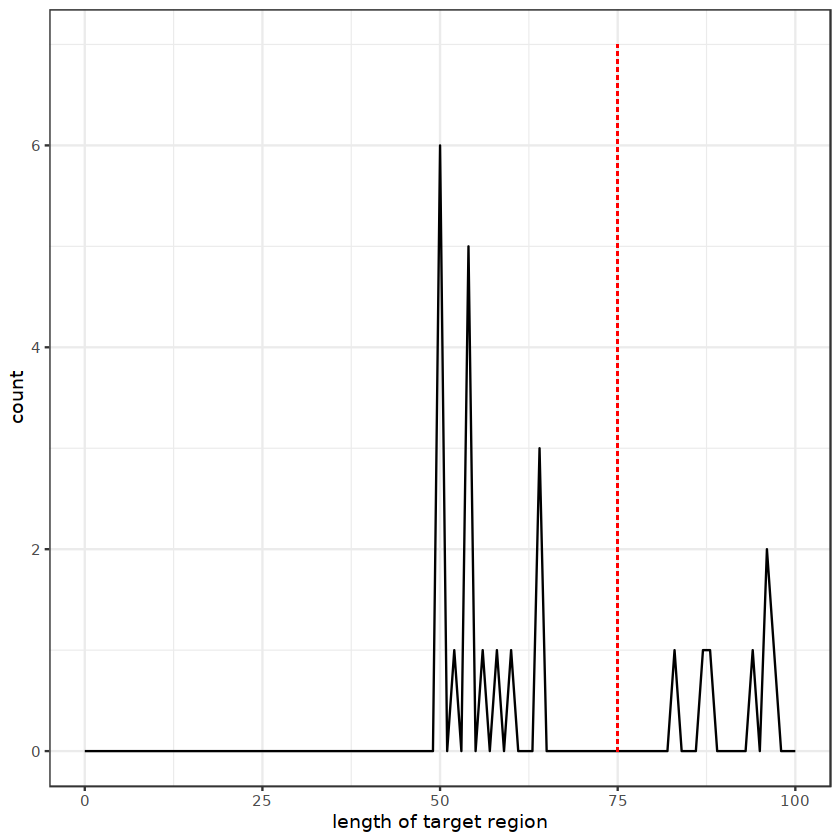

In [40]:
guide.regions <- guide.regions %>% mutate(length = V3 - V2)

p1 <- ggplot(guide.regions) +
  geom_freqpoly(aes(x = length), binwidth = 1) +
  xlab("length of target region") +
  xlim(0,100) +
geom_segment(aes(x = 75, y = 0, xend = 75, yend = 7), colour = "red", linetype="dashed", size=0.5)+
  theme_bw()
p1

In [41]:
##Selecting regions under 75bp to extend it by 100 on either side

head(guide.regions)

guide.regions <- guide.regions %>% mutate (midpt = ((V2+V3)/2))

guide.regions$length <- as.numeric(guide.regions$length)
guide.regions$midpt <- as.numeric(guide.regions$midpt)
guide.regions$V2 <- as.numeric(guide.regions$V2)
guide.regions$V3 <- as.numeric(guide.regions$V3)

for (i in 1:nrow(guide.regions)){
  if(guide.regions$length[i] <= 75) {
      guide.regions$V2[i] <- (guide.regions$midpt[i]-100)
      guide.regions$V3[i] <- (guide.regions$midpt[i]+100)
  }
}


head(guide.regions)

V1,V2,V3,length
chr11,30131684,30131855,171
chr11,30137524,30137647,123
chr11,30137990,30138040,50
chr11,30138948,30139006,58
chr11,30143198,30144258,1060
chr11,30170780,30170832,52


V1,V2,V3,length,midpt
chr11,30131684,30131855,171,30131770
chr11,30137524,30137647,123,30137586
chr11,30137915,30138115,50,30138015
chr11,30138877,30139077,58,30138977
chr11,30143198,30144258,1060,30143728
chr11,30170706,30170906,52,30170806


Warning message:
“Removed 93 rows containing missing values (geom_segment).”

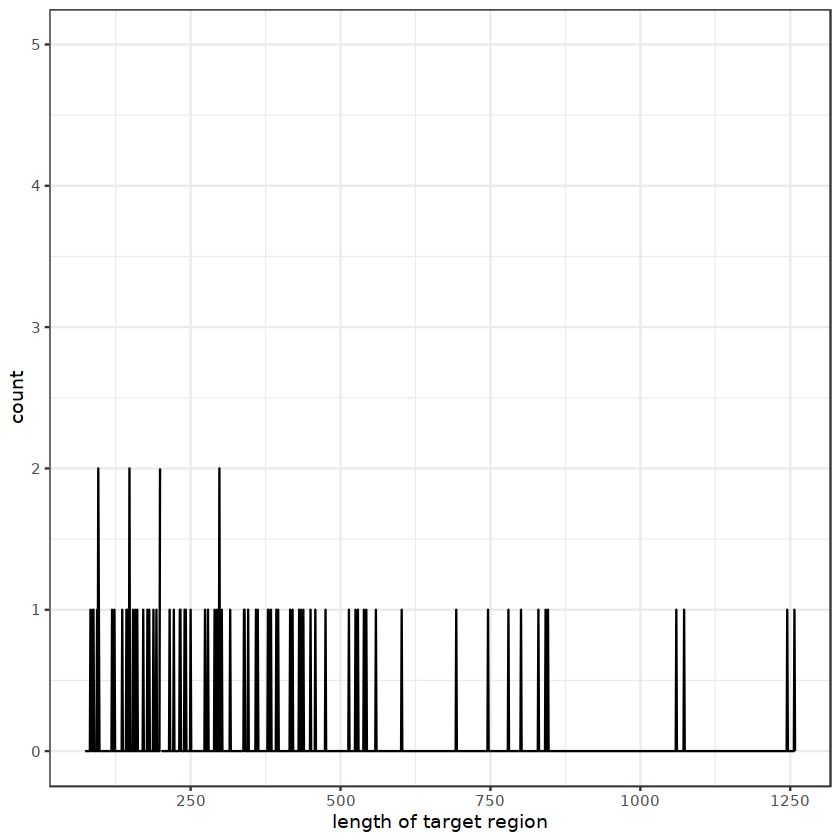

In [43]:
###Replotting the lengths : 
#guide.regions <- guide.regions %>% mutate(length = V3 - V2)

p2 <- ggplot(guide.regions) +
  geom_freqpoly(aes(x = length), binwidth = 1) +
  xlab("length of target region") +
ylim(0,5) +
geom_segment(aes(x = 75, y = 0, xend = 75, yend = 7), colour = "red", linetype="dashed", size=0.5)+
  theme_bw()
p2

In [50]:
##Save this new bed file :

bed.file <- guide.regions %>% select(c("V1", "V2", "V3"))
head(bed.file)

write.table(bed.file, file = "ATACandDHSregforguides-rem75.bed", sep = "\t",
            row.names = FALSE, quote = FALSE)

V1,V2,V3
chr11,30131684,30131855
chr11,30137524,30137647
chr11,30137915,30138115
chr11,30138877,30139077
chr11,30143198,30144258
chr11,30170706,30170906


In [ ]:
#Final merging + sorting of the bed file. Switch to python kernel again

In [1]:
%%bash
sbatch --job-name=intersect-ATAC-DHS-withgenereg \
    -p all \
    --exclude dl-01 \
    -o /data/reddylab/Laavanya/pcosStarrSeq/experiments/20211005-SelectingRegionsforguides/logs/interscet.%J.log \
    -e /data/reddylab/Laavanya/pcosStarrSeq/experiments/20211005-SelectingRegionsforguides/logs/intersect.%J.err \
    --mail-type=END,FAIL \
    --mail-user=ls331@duke.edu \
    <<'EOF'
#!/bin/bash

cd /data/reddylab/Laavanya/pcosStarrSeq/experiments/20211005-SelectingRegionsforguides

module load samtools
module load bedtools2

bedtools sort -i ATACandDHSregforguides-rem75.bed > ATACandDHSregforguides-rem75.sorted.bed
bedtools merge -i ATACandDHSregforguides-rem75.sorted.bed > ATACandDHSregforguides-rem75.sorted.merged.bed

EOF

wc -l *bed

Submitted batch job 26613194
    110 ATAC.and.DHS.concat.bed
     93 ATACandDHSregforguides-rem75.bed
    110 ATACandDHS.sorted.bed
     93 ATACandDHS.sorted.merged.bed
 103467 COV434.H295R.unionATACpeak.bed
     55 FSHBDENND1A_ATAC_forgRNAdesign_100kb.bed
   2240 FSHBDENND1A_DHS_forgRNAdesign_100kb.bed
   1907 FSHBDENND1A_DHS_forgRNAdesign_50kb.bed
      2 FSHBDENND1A_plus100kb.bed
      2 FSHBDENND1A_plus50kb.bed
     55 oldatacgeneregions.bed
     55 selectedDHS.merged.bed
     55 selectedDHSregions.bed
     56 selectedDHSsites.bed
     55 selectedDHS.sorted.bed
     56 selectedDHS.sorted.merged.bed
 108411 total


In [4]:
%%bash
wc -l *bed

    110 ATAC.and.DHS.concat.bed
     93 ATACandDHSregforguides-rem75.bed
     93 ATACandDHSregforguides-rem75.sorted.bed
     93 ATACandDHSregforguides-rem75.sorted.merged.bed
    110 ATACandDHS.sorted.bed
     93 ATACandDHS.sorted.merged.bed
 103467 COV434.H295R.unionATACpeak.bed
     55 FSHBDENND1A_ATAC_forgRNAdesign_100kb.bed
   2240 FSHBDENND1A_DHS_forgRNAdesign_100kb.bed
   1907 FSHBDENND1A_DHS_forgRNAdesign_50kb.bed
      2 FSHBDENND1A_plus100kb.bed
      2 FSHBDENND1A_plus50kb.bed
     55 oldatacgeneregions.bed
     55 selectedDHS.merged.bed
     55 selectedDHSregions.bed
     56 selectedDHSsites.bed
     55 selectedDHS.sorted.bed
     56 selectedDHS.sorted.merged.bed
 108597 total
